# Quantum Information and Computation

by Ana Neri

UMinho 2019

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

# Basics

## Qubit

<!-- ## Single Qubit Quantum states -->

A single qubit quantum state <!-- can be written as -->

$$|\psi\rangle = \alpha|0\rangle + \beta |1\rangle$$


<!-- where $\alpha$ and $\beta$ are complex numbers. In a measurement the probability of the bit being in $|0\rangle$ is $|\alpha|^2$ and $|1\rangle$ is $|\beta|^2$.--> As a vector this is

$$
|\psi\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix} \quad \rightarrow \quad |0\rangle = \binom{1}{0} \; ;\; |1\rangle = \binom{0}{1}\,;
$$

<!-- Note due to conservation probability $|\alpha|^2+ |\beta|^2 = 1$ and since global phase is undetectable $|\psi\rangle := e^{i\delta} |\psi\rangle$ we only require two real numbers to describe a single qubit quantum state. -->

<!-- A convenient representation is -->
The normalization rule $|\alpha|^2+ |\beta|^2 = 1$ allows for an alternate representation:

$$|\psi\rangle = \cos \left( \frac{\theta}{2} \right)|0\rangle + \sin\left( \frac{\theta}{2}\right) e^{i\phi}|1\rangle$$

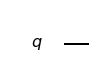

In [2]:
# Create quantum circuit with 1 qubit
qc = QuantumCircuit(1)

qc.draw()

### Plot Quantum State - (Qiskit Tutorials / Plotting Data in Qiskit ) 

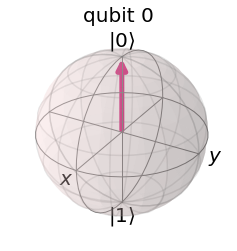

In [3]:
# visualizing the qubit 

backend = Aer.get_backend("statevector_simulator")

# Plot the Bloch sphere of the qubit state after performing the Hadamard gate
result0 = execute(qc, backend).result()
vector0= result0.get_statevector(qc)
plot_bloch_multivector(vector0)


#  The projection of the quantum state onto the single qubit space and plotting on a bloch sphere. 

In [4]:
vector0

# vector

array([1.+0.j, 0.+0.j])

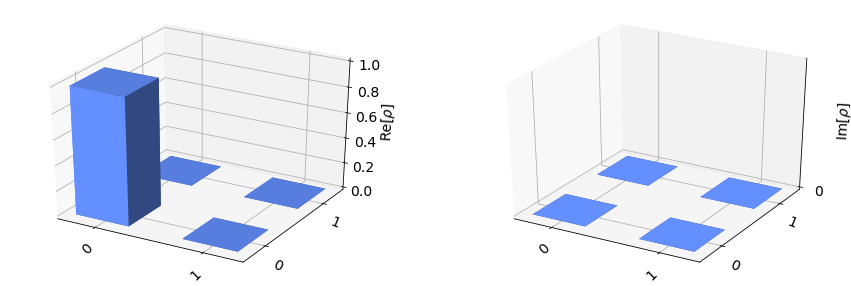

In [5]:
plot_state_city(vector0)

#  The standard view for quantum states where the real and 
# imaginary (imag) parts of the state matrix are plotted like a city

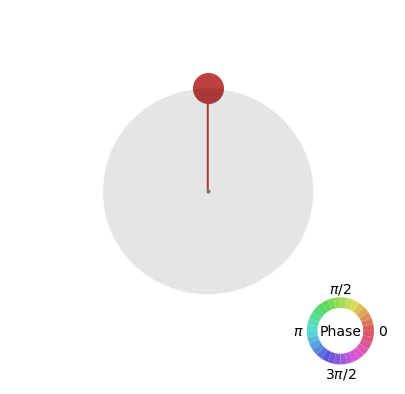

In [6]:
plot_state_qsphere(vector0)

# The Qiskit unique view of a quantum state where the amplitude and phase of the state vector 
# are plotted in a spherical ball. 
# The amplitude is the thickness of the arrow and the phase is the color. 
# For mixed states it will show different 'qsphere' for each component.

## Quantum gates

Quantum gates/operations may be represented as matrices. <!-- A gate which acts on a qubit is represented by a $2\times 2$ unitary matrix $U$. --> 

The action of the quantum gate is expressed by the product of its matrix with the vector representing the quantum state.

$$|\psi'\rangle = U|\psi\rangle$$

<!-- A general unitary must be able to take the $|0\rangle$ to the above state. That is -->

<!-- $$
U = \begin{pmatrix}
\cos(\theta/2) & a \\
e^{i\phi}\sin(\theta/2) & b 
\end{pmatrix}
$$ -->

<!-- where $a$ and $b$ are complex numbers constrained such that $U^\dagger U = I$ for all $0\leq\theta\leq\pi$ and $0\leq \phi<2\pi$. This gives 3 constraints and as such $a\rightarrow -e^{i\lambda}\sin(\theta/2)$ and $b\rightarrow e^{i\lambda+i\phi}\cos(\theta/2)$ where $0\leq \lambda<2\pi$ giving --> 

The most general form of a single qubit unitary gate

$$
U = \begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2) 
\end{pmatrix}.
$$

An $n$-qubit quantum gate is represented by a $2^n \times 2^n$ matrix.
<!-- This is the most general form of a single qubit unitary. -->


Although the basic gate set of IBM Q devices is $$\{id, u1, u2, u3, cx\}$$ 

Where
$$
U_3(\theta,\phi,\lambda) = \begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2) 
\end{pmatrix}.
$$

QISKit supports many gates. (Qiskit Tutorials / Summary of quantum operations)

**task 1** 

Consider you have a chip that allows you to add $X$-gates to your circuit.


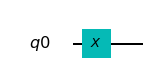

In [7]:
n = 1
from qiskit import QuantumRegister
qr = QuantumRegister(n)

qc_x = QuantumCircuit(qr)

# Applying quantum gates:
# qc_x.<GATE>(qr)

# In this case you only need to replace <GATE> by x
qc_x.x(qr)

# Draw the circuit
qc_x.draw(output='mpl')

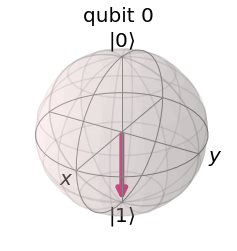

In [8]:
# Execute circuit with the statevector simulator
result_x = execute(qc_x, backend).result()

# Get statevector representation
vector_x = result_x.get_statevector(qc_x)

# Draw Bloch sphere
plot_bloch_multivector(vector_x)

Now, test how the result changes when you use the qc_x.x(qr) command multiple times.

&nbsp;


| 0 X-gates | 1 X-gate | 2 X-gates| 3 X-gates|
|-----------|----------|----------|----------|
| state 0   | state 1  | ?        | ?        |

Fill the table.

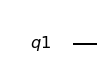

In [9]:
# Define quantum circuit qc_x
qr = QuantumRegister(1)
qc_x = QuantumCircuit(qr)


# Add 2 x-gates



qc_x.draw(output='mpl')

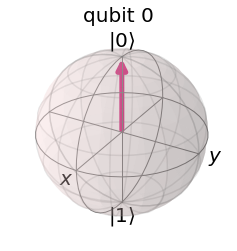

In [10]:
# Visualize Bloch sphere again
result_x = execute(qc_x, backend).result()
bloch_x = result_x.get_statevector(qc_x)
plot_bloch_multivector(bloch_x)

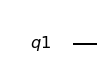

In [11]:
# You can also just add X-gates to a previously defined circuit


qc_x.draw(output='mpl')

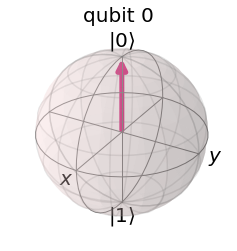

In [12]:
# Test results
result_x = execute(qc_x, backend).result()
bloch_x = result_x.get_statevector(qc_x)
plot_bloch_multivector(bloch_x)

**task 2** 

By now your probably already notice that $X$ works like the classical NOT gate.

Let's introduce a new gate. Hadamard, the superposition gate. Qiskit simply calls it h.

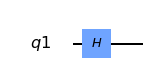

In [13]:
# Define quantum circuit qc_h
qc_h = QuantumCircuit(qr)

# qc_h.<GATE>(qr)
# in this case you only need to replace <GATE> by h. See the example
qc_h.h(qr)

qc_h.draw(output='mpl')

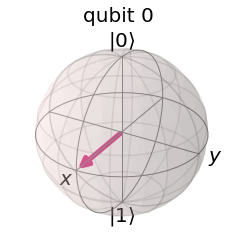

In [14]:
result_h = execute(qc_h, backend).result()
bloch_h = result_h.get_statevector(qc_h)
plot_bloch_multivector(bloch_h)

Apply the Hadamard gate some times to get an intuition about its behavior.

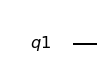

In [15]:
qc_h = QuantumCircuit(qr)

# write your circuit:


qc_h.draw(output='mpl')

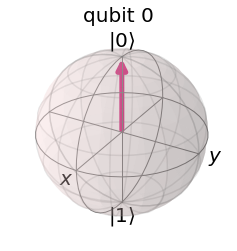

In [16]:
result_h = execute(qc_h, backend).result()
bloch_h = result_h.get_statevector(qc_h)
plot_bloch_multivector(bloch_h)

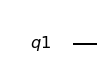

In [17]:
qc_h = QuantumCircuit(qr)

# write your circuit

qc_h.draw(output='mpl')

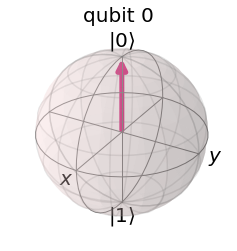

In [18]:
result_h = execute(qc_h, backend).result()
bloch_h = result_h.get_statevector(qc_h)
plot_bloch_multivector(bloch_h)

**task 3** 

Add measure gate after an odd number of Hadamard gates.

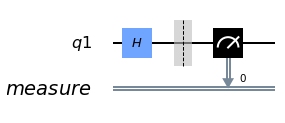

In [19]:
qc_h = QuantumCircuit(qr)

# qc_h.<GATE>(qr)
# in this case you only need to replace <GATE> by h. See the example
qc_h.h(qr)
#measure all qubits in circuit
qc_h.measure_all()

qc_h.draw(output='mpl')

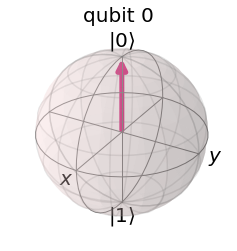

In [20]:
result_h = execute(qc_h, backend).result()
bloch_h = result_h.get_statevector(qc_h)
plot_bloch_multivector(bloch_h)

Three executions were already made, fill the table with the rest of the outputs and add executions if you want.

&nbsp;

|execution number|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|...|
|----------------|-|-|-|-|-|-|-|-|-|--|--|--|--|--|--|---|
|output          |1|1|0| | | | | | |  |  |  |  |  |  |...|

<div class="alert alert-block alert-info">
What you see in this exercise is <b> superposition </b> .
&nbsp;    
    
This is the story about Schrödinger's cat. The poor cat is in a box with radioactive material, which can release some particles or not. If the material releases particles, they will set in motion a chain of events that will kill the cat.  

After 1 hour the cat has a probability of 50% of being dead.

Since we can not be sure until we open the box, we say that can is alive and dead during that hour.

In other words, the cat is in every possible state until it is observed.
    
</div>

**task 4**

Consider a case where our qubit started in superposition:

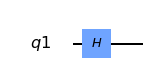

In [21]:
qc_h = QuantumCircuit(qr)

# qc_h.<GATE>(qr)
# in this case you only need to replace <GATE> by h. See the example
qc_h.h(qr)
#add a x-gate:


qc_h.draw(output='mpl')

What was the result?

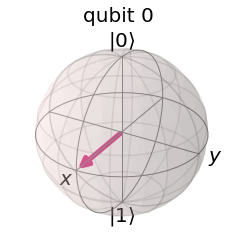

In [22]:
result_h = execute(qc_h, backend).result()
bloch_h = result_h.get_statevector(qc_h)
plot_bloch_multivector(bloch_h)

**task 5** 

You have a new chip, which has the quantum logic gate $Z$.

Execute the circuit with one and two $Z$ gates.

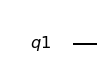

In [23]:
qc_z = QuantumCircuit(qr)

# start with the default state:
# add a z-gate:


qc_z.draw(output='mpl')

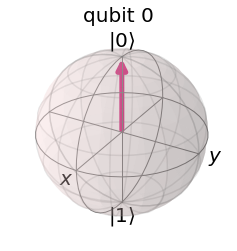

In [24]:
result_z = execute(qc_z, backend).result()
bloch_z = result_z.get_statevector(qc_z)
plot_bloch_multivector(bloch_z)

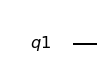

In [25]:
qc_z = QuantumCircuit(qr)

# start with the default state:
# add two z-gates:


qc_z.draw(output='mpl')

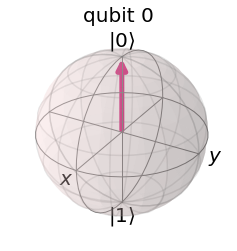

In [26]:
result_z = execute(qc_z, backend).result()
bloch_z = result_z.get_statevector(qc_z)
plot_bloch_multivector(bloch_z)

Put your circuit in superposition (use one Hadamard).

Test your circuit twice, one with one $Z$ gate and another one with two $Z$ gates.

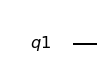

In [27]:
qc_z = QuantumCircuit(qr)

# start with a superposition state:

#add a z-gate:


qc_z.draw(output='mpl')

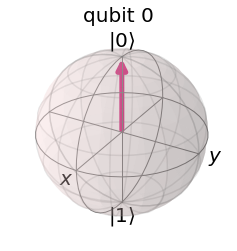

In [28]:
result_z = execute(qc_z, backend).result()
bloch_z = result_z.get_statevector(qc_z)
plot_bloch_multivector(bloch_z)

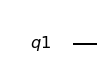

In [29]:
qc_z = QuantumCircuit(qr)

# start with a superposition state:

#add two z-gates:


qc_z.draw(output='mpl')

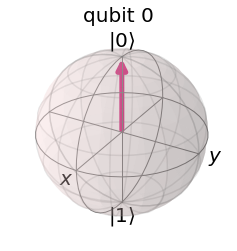

In [30]:
result_z = execute(qc_z, backend).result()
bloch_z = result_z.get_statevector(qc_z)
plot_bloch_multivector(bloch_z)

What kind of rotation is applied by $Z$-gate?

**task 6**

I want to get from the default state 0 to state 1 but my chip is lacking the $X$ gate. Can you find a way to get the same result with Hadamard gates and $Z$-gates?

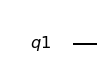

In [31]:
qc = QuantumCircuit(qr)

# Add quantum operations


qc.draw(output='mpl')

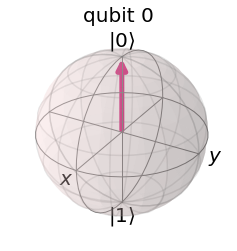

In [32]:
result = execute(qc, backend).result()
bloch = result.get_statevector(qc)
plot_bloch_multivector(bloch)


## The theory:
### Pauli gates
**Gate $X$: bit-flip gate**

The $X$-gate is also known as NOT gate or “bit-flip”, since it changes a state $| 0 \rangle $ to $| 1 \rangle $ and vice versa. This is the quantum analogue to a classical NOT gate.

On the Bloch sphere representation, this operation corresponds to a rotation of the state around the X-axis by $\pi$ radians.

&nbsp; 

**Gate $Y$: bit-and-phase-flip gate**

It is equivalent to a rotation around Y-axis of the Bloch sphere by $\pi$ radians. This gate maps $| 0 \rangle $ to $i | 1 \rangle $, and $| 1 \rangle$ to $ - i | 0 \rangle$

&nbsp; 

**Gate $Z$: phase-flip gate**

It leaves the basis state $|0 \rangle $ unchanged, while mapping $| 1 \rangle$ to $- | 1 \rangle $.

&nbsp;

### Hadamard gate

The Hadamard gate may be used to create superposition. It maps the basis state $| 0 \rangle$ to $| + \rangle =\frac{| 0 \rangle + | 1 \rangle }{\sqrt{2}}$, and $| 1 \rangle $ to $ | - \rangle =\frac{ |0 \rangle - |1 \rangle }{\sqrt{2}}$. On the Bloch sphere, $| + \rangle$ and $| - \rangle $ are represented by points on the X axis.

When measured, these states have equal probability of becoming $| 1\rangle $ or $| 0 \rangle $, since the square modulus of the probability amplitude for each of the basis states has equal value.

In fact, $|+\rangle $ and $| - \rangle $ are indistinguishable when measured on the computational basis. However, the states can be identified by measuring the qubit on the superposition basis, i.e. along the X-axis. A way to achieve this is by simply applying an Hadamard gate before performing the measurement.

 

Note: The Hadamard gate, along with the X, Y and Z gates, is self-inverse: $H.H = I$.


## multi-qubit operation

<div class="alert alert-block alert-info">

What about <b> entanglement </b> ?

&nbsp;    
    
Let's get the poor cat again. Now the cat has a friend. They are both inside boxes and they are entangled.

I can take my cat home (box A) and you take your cat home (box B). Eventually, I open my box and I find my cat is dead, but at the same time, I know that your cat is alive. I didn't have to call you but I know this. 
    
</div>

In quantum computation, entanglement is obtained by control gates.

Test the gate $CX$, also called controlled-$NOT$

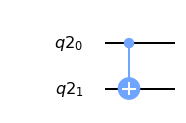

In [33]:
# The control gate is a multi qubit gate
# You now need two qubits - and two bits to store the results
qr = QuantumRegister(2)
qc_cx = QuantumCircuit(qr)

# qc_cx.<GATE>(qr[n], qr[m])
# in this case you only need to replace <GATE> by cx.
# and you also need to change n and m, 
# n will be the control qubit and m the target qubit

# See the example
qc_cx.cx(qr[0],qr[1])

qc_cx.draw(output='mpl')

Test this circuit.

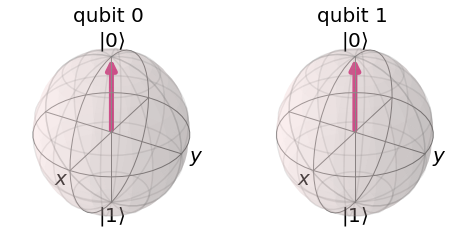

In [34]:
result = execute(qc_cx, backend).result()
bloch = result.get_statevector(qc_cx)
plot_bloch_multivector(bloch)

**task 7**

Change the initial state of the qubits and test $CX$.

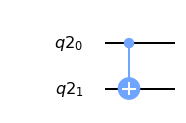

In [35]:
qc_cx = QuantumCircuit(qr)

# Add x and h gate to the circuit to fill the table below

# Now we have the control gate  
qc_cx.cx(qr[0],qr[1])

qc_cx.draw(output='mpl')

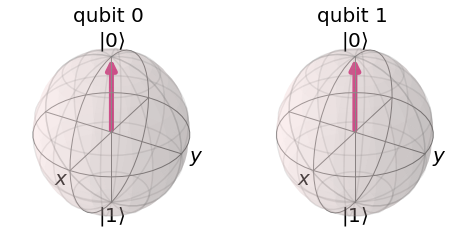

In [36]:
result_cx = execute(qc_cx, backend).result()
bloch_cx = result_cx.get_statevector(qc_cx)
plot_bloch_multivector(bloch_cx)

Fill the table, feel free to add your tests.

| input | |output | |
|-------|-|-------|-|
|0      |0|0      |0|
|0      |1|       | |
|1      |0|       | |
|1      |1|       | |

**task 8**

Now let's test something less trivial.

$CZ$ gate - control with gate $Z$ - is not in the list of the gate we can simply write in Qiskit.

Find a circuit that does the same as a control-$Z$. (exercise 6 may help you)

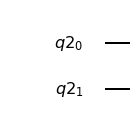

In [37]:
qc_cz = QuantumCircuit(qr)

# Write your circuit:


qc_cz.draw(output='mpl')

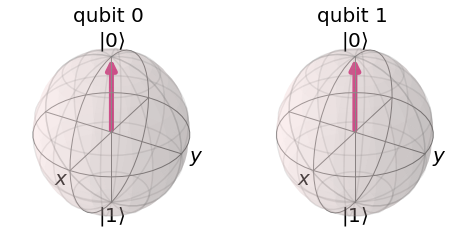

In [38]:
result = execute(qc_cz, backend).result()
bloch = result.get_statevector(qc_cz)
plot_bloch_multivector(bloch)

## Multi-qubit states

 

Multiple quantum bits can be described with the ket notation. The tensor product is typically implicit; for a state composed of qubits $q_0$ and $q_1$:

 
$$ |q_1\rangle \otimes |q_0\rangle = |q_1\rangle |q_0\rangle = |q_1 q_0\rangle $$

 
### Entanglement and Bloch sphere for multi-qubit states

 

Since qubits can be entangled, multi-qubit states, in general, cannot be expressed by simply representing each qubit's Bloch sphere. This is because the dimension of the vector space rises exponentially with the number of qubits, to account for correlation between qubits. One attempt to visualize multi-qubit states is made here.

For a quantum system, its description is more than the sum of descriptions for each individual qubit.

 
### Multi-qubit operations

 
**CNOT gate**

The controlled-NOT (or controlled-$X$) gate allows for the creation of entanglement between two qubits in a quantum circuit. The CNOT gate's action on basis states is to flip, i.e. apply an $X$ gate to, the target qubit (denoted as $\oplus$ in quantum circuits) if the control qubit (denoted as $\bullet$), is $|1\rangle$; otherwise the target qubit goes unchanged.

**Other multi-qubit operations**

General single qubit gates together with the $CNOT$ allow for universal quantum computations, i.e. it is possible to decompose any quantum operations over $n$ qubits to arbitrary precision, using only this set of gates. How to efficiently determine and perform such a decomposition, however, is not a trivial problem.

Other notable operators:

* SWAP gate, which exchanges the state between two qubits;

* Toffoli gate (or CCNOT), which performs a NOT operations on a target qubit, using two other qubits as controls.



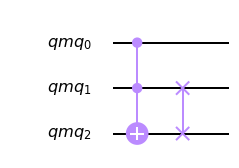

In [39]:
# Create registers and quantum circuit
qr = QuantumRegister(3, 'qmq')
qc_mq = QuantumCircuit(qr)

# Apply Toffoli - first two arguments are the controls
qc_mq.ccx(qr[0], qr[1], qr[2])

# Swap two qubits
qc_mq.swap(qr[1], qr[2])

# Draw the circuit
qc_mq.draw(output='mpl')


## Measurement gate

A measurement causes the system to collapse to a deterministic state i.e. stabilise in a non-reversible way. A repeated measurement of the collapsed quantum system will return the same results, just like repeated readings of a bit string.

When we perform a measurement on a qubit, we observe either $|0\rangle$ or $|1\rangle$ - which is then interpreted as a binary digit, $0$ or $1$. As such, a single measurement of a quantum system yields at most 1 bit per qubit. When a quantum system is in a superposition of basis states, many more measurements are needed to accurately estimate probability amplitudes.

<div class="alert alert-block alert-info">

* In Qiskit, measurement operations can be performed by defining the correspondence between the measured qubit and the bit where the result of the operation (0 or 1) is going to be stored. 
    
* Since the measuring process physically collapses the qubit into a classical state, QISKit does not allow for subsequent quantum operations on the measured qubit.
</div>


{'01': 517, '00': 483}


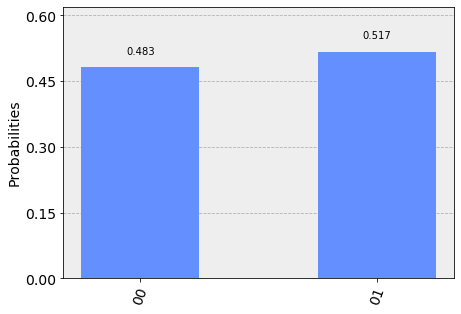

In [42]:

# Use Aer's qasm_simulator
q_simulator = Aer.get_backend('qasm_simulator')

# Define a quantum circuit
from qiskit import ClassicalRegister
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
q_meas = QuantumCircuit(qr,cr)

# Add quantum operations, for example H
q_meas.h(qr[0])


# Measure the qubits
q_meas.measure(qr, cr)

# or
# measure_all() 
# Adds measurement to all qubits. 
# Creates a new ClassicalRegister with a size equal to the number of qubits being measured.

# Execute the circuit 1000 times on the qasm simulator
job_a = execute(q_meas, q_simulator, shots=1000)

# Grab the results from the job
result_a = job_a.result()
counts_a = result_a.get_counts(q_meas)

# Print frequencies, and plot histogram
print(counts_a)
plot_histogram(counts_a)

**task 8**

The half adder produces the addition of bits. Classicaly, the inputs A and B are added, and give the output S (sum) and C (carry), a bit that flips from $0$ to $1$ if both inputs are $1$.
 
The truth table of inputs and outputs is below; consider that $q_0$ is left unchanged after the block, and $q_2$ is in the state $|0\rangle$ at input.

|$q_0$ (input) = A | $q_1$ (input) = B |$q_1$ (output) = S |$q_2$ (output) = C|
|------------------|-------------------|-------------------|------------------|
|0                 | 	0 	           | 0                 | 	0             |
|1 	               | 0                 | 	1 	           |0                 |
|0 	               | 1                 | 	1              |	0             |
|1                 |	1              | 	0              |	1             |

To build the equivalent block with quantum circuits, we will need 3 qubits, which is the minimum number of qubits to guarantee that this block is reversible.

* Using $CNOT$ and/or Toffoli gates, build a quantum half-adder circuit.
* How to interpret the result when the inputs are in superposition?


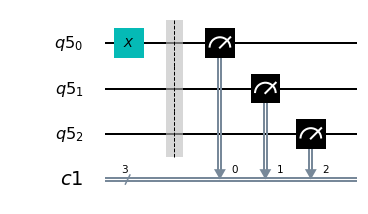

In [43]:
# Create registers
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

# Quantum Circuit
half_adder = QuantumCircuit(qr, cr)

# Prepare input states. Example: A=1, B=0
half_adder.x(qr[0])

# Perform multiqubit operations


# Barriers make circuits prettier
half_adder.barrier()

# Measure
half_adder.measure(qr[0], cr[0])
half_adder.measure(qr[1], cr[1])
half_adder.measure(qr[2], cr[2])
#or
#half_adder.measure_all()


# Draw
half_adder.draw(output='mpl')

{'001': 1000}


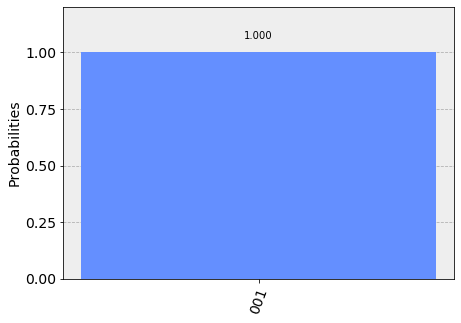

In [44]:
job_ha = execute(half_adder, q_simulator, shots=1000)

counts_ha = job_ha.result().get_counts(half_adder)

print(counts_ha)

plot_histogram(counts_ha)

# Deutsch-Josza Algorithm

### Problem formulation

Consider a function $f: \{0,1\}^n \rightarrow \{0,1\}$ that maps an array of $n$ bits into either 0 or 1. We do not know the logic behind it. We know that it is either constant or balanced:

* Constant: its output is always 0 or always 1;
* Balanced: outputs 0 for half the input values and 1 for the other half.

For the case that $n=1$ we have $f: \{0,1\} \rightarrow \{0,1\}$ that maps a single bit into either 0 or 1. We are given a black box, an oracle, that takes as input a bit and outputs the unknown value.

<div class="alert alert-block alert-info">

To answer this question classically, we would always need two function invocations. We could do $f(0)$ and $f(1)$ and see if it is either constant or balanced. With a quantum computer, we can do a **single pass** over the oracle gate discover whether it is constant or balanced, an impossible feat in classical computing. Generalizing for a function $f: \{0,1\}^n \rightarrow \{0,1\}$, a classical algorithm would need $2^{n-1}+1$ passes, while **a quantum function would still require 1 pass**. 
</div>

### Algorithm

What are the results of measurement?

* if f is constant $\rightarrow$ output is $|0 \cdots 0\rangle$
* if f is balanced $\rightarrow$ output is otherwise.

 
### The Deutsch-Josza algorithm demonstrates quantum paralelism

A quantum register has the ability to exist in a superposition of base states - each one may be thought of as a single argument to a function.

A function performed on the register in a superposition of states is thus performed on each of the components of the superposition, while only being applied once.

 
**task 9**

1. Implement the Deutsch-Josza algorithm arount the black box in the circuit below. Use the results to find if the box is encoding a constant or a balanced function.
2. Verify the result by building a truth table for the oracle (below).

|input  |          |     output|
|-------|----------|-----------|
|qubit 0| 	qubit 1| 	qubit 2|
|0 	    |0         |       	   |
|1 	    |0 	       |           |
|0 	    |1 	       |           |
|1 	    |1         |           |	

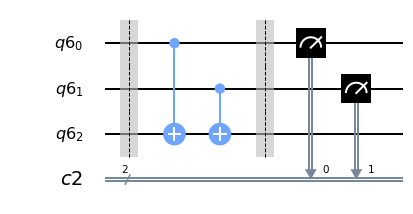

In [45]:
# A quantum circuit with 3 qubits and 2 bits
qr = QuantumRegister(3)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)

# Flip the last qubit to |1>, add Hadamards to whole register




# Oracle
qc.barrier()
qc.cx(qr[0],qr[2])
qc.cx(qr[1],qr[2])
qc.barrier()

# Return qubits to the computational basis


# Measure
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])

# Draw the circuit
qc.draw(output='mpl')

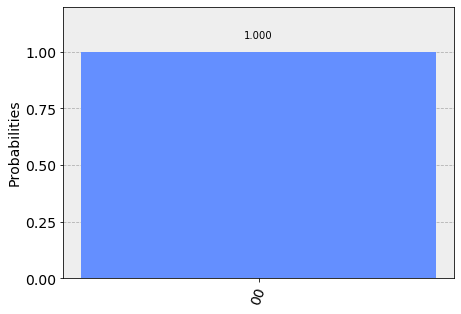

In [47]:
backend = Aer.get_backend("qasm_simulator")

shots = 1
job_DJ_s = execute(qc, backend, shots=shots)

result_DJ_s = job_DJ_s.result()
counts_DJ_sim = result_DJ_s.get_counts(qc)

plot_histogram(counts_DJ_sim)

# IBM Q Provider

In [48]:
# Checking the available backends from the IBMQ provider

my_provider_ibmq = IBMQ.get_provider(hub='ibm-q', group='open', project='main') 

my_provider_ibmq.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [49]:
%qiskit_backend_overview

In [53]:
# Define backend
backend = my_provider_ibmq.get_backend('ibmq_16_melbourne')

# See backend information
backend

<IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>

In [54]:
# Monitor queued jobs
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [55]:
# Define number of experiments
shots = 1024
job_DJ_r = execute(qc, backend, shots=shots)

# Save job ID if you wish to retrieve results later
jobID_DJ_r = job_DJ_r.job_id()

print('JOB ID: {}'.format(jobID_DJ_r))

JOB ID: 5dcd79e8ab68f50011352f58


In [56]:
# Now you can retrieve job using the ID
job_get=backend.retrieve_job(jobID_DJ_r)

# Get measurement information
counts_DJ_run = job_get.result().get_counts(qc)

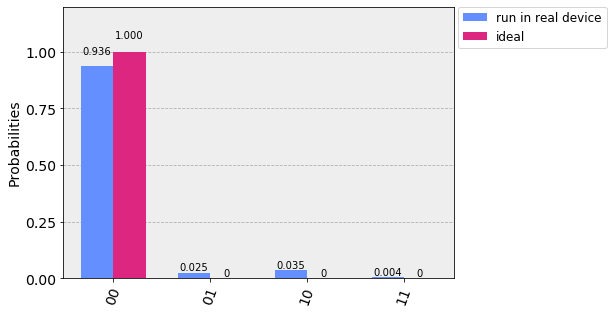

In [57]:
plot_histogram([counts_DJ_run, counts_DJ_sim ], legend=[ 'run in real device', 'ideal'])

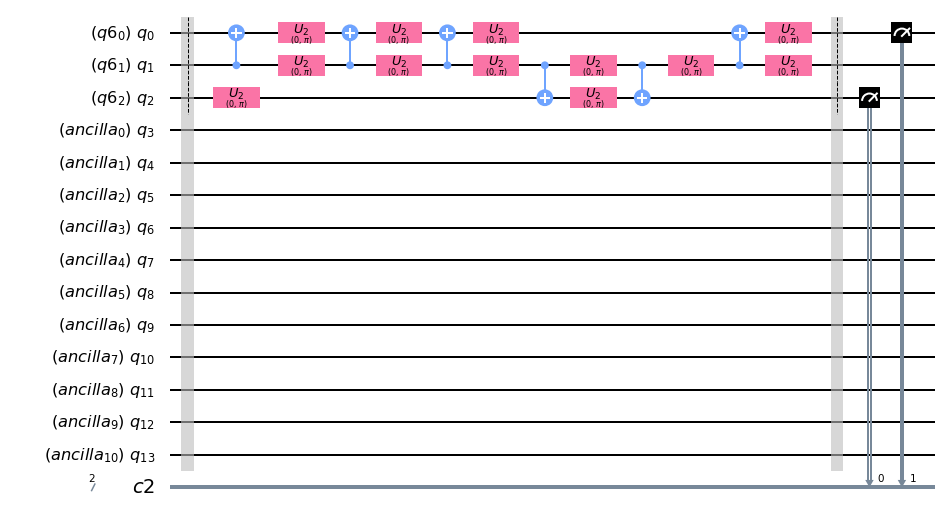

In [61]:
from qiskit.compiler import transpile

backend = my_provider_ibmq.get_backend('ibmq_16_melbourne')

qc_t_real = transpile(qc, backend=backend)

qc_t_real.draw(output='mpl', scale=0.5)

In [62]:
qc.depth()

3

In [63]:
qc_t_real.depth()

13

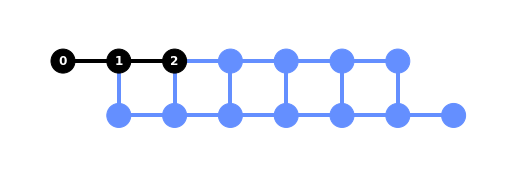

In [64]:
plot_circuit_layout(qc_t_real, backend)

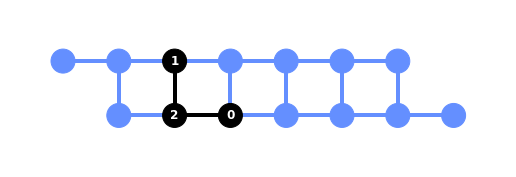

In [67]:
qc_t_opt = transpile(qc, backend=backend, optimization_level=3)
plot_circuit_layout(qc_t_opt, backend)

In [65]:
%qiskit_version_table